In [3]:
import numpy as np
import pandas as pd
import xlrd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


xl = pd.ExcelFile('LV_data_Krell_study.xlsx') # loading spreadsheet
print(xl.sheet_names) # printing sheet name
df1 = xl.parse('Tabelle1') # loading sheet into dataframe
print(df1.shape)
df1.head()

['Tabelle1']
(353, 11)


,Patienten-ID,Gender,Age,Weight,Height,ESV,EDV,SV,EF,Herzfrequenz,Körperoberfläche nach Haycock
0,BONN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5002,1,37.0,13.5,98.0,9.1,23.4,14.3,61.2,108.0,0.605614
2,5003,2,158.0,30.0,139.0,34.0,87.3,53.3,61.0,89.0,1.068728
3,5004,1,186.0,46.0,162.0,38.7,118.6,79.9,67.4,81.0,1.429102
4,5005,2,83.0,24.5,118.0,20.5,55.5,35.0,63.0,81.0,0.898189


In [4]:
df1.describe()

,Age,Weight,Height,ESV,EDV,SV,EF,Herzfrequenz,Körperoberfläche nach Haycock
count,350.000000,350.000000,350.000000,352.000000,352.000000,352.000000,352.000000,350.000000,350.000000
mean,96.659171,31.402657,126.598286,26.898892,68.752557,41.949290,61.090341,90.602857,1.036917
std,60.917193,19.345636,35.719935,15.774989,39.737879,24.853472,6.906179,22.977614,0.473118
min,0.030000,2.160000,40.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.102444
25%,47.000000,16.250000,102.000000,15.000000,39.637500,24.275000,57.875000,75.000000,0.690784
50%,93.000000,26.500000,130.000000,25.000000,62.050000,36.750000,61.200000,86.000000,0.977335
75%,146.000000,45.000000,157.000000,37.925000,95.800000,58.600000,64.300000,101.000000,1.398658
max,219.000000,92.700000,192.000000,72.500000,239.900000,168.300000,77.500000,182.000000,3.108999


[20, 10]


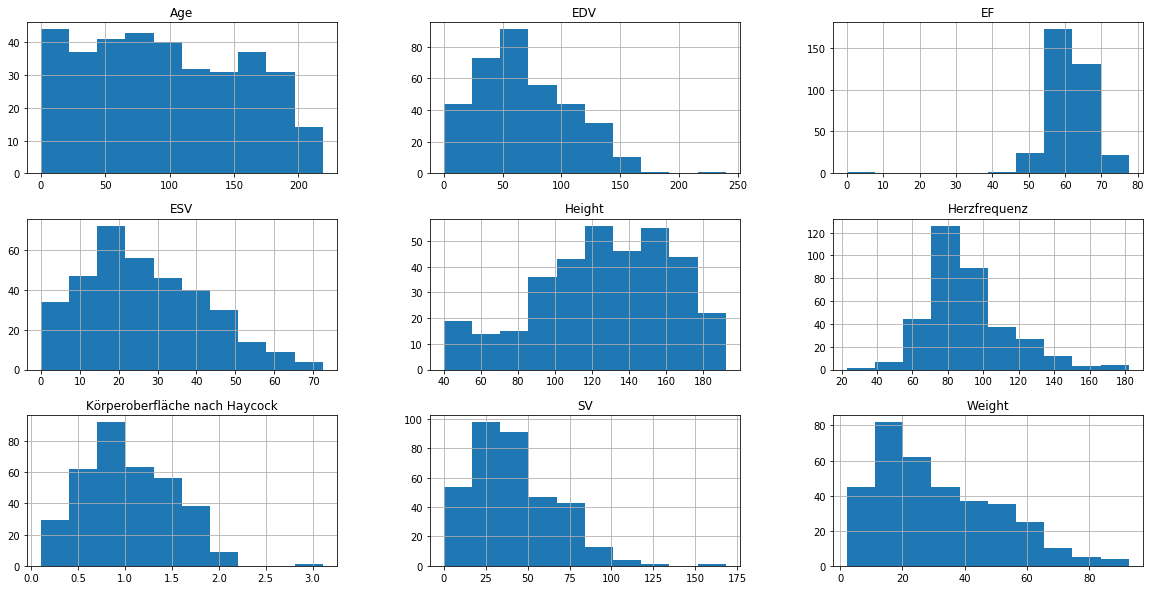

In [16]:
df1.hist()
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print(fig_size) #100, 60
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.show()

In [6]:
tmp=list(df1.groupby("Gender"))
df1_gender1=tmp[0][1]
df1_gender2=tmp[1][1]

In [7]:
df1_gender1

,Patienten-ID,Gender,Age,Weight,Height,ESV,EDV,SV,EF,Herzfrequenz,Körperoberfläche nach Haycock
1,5002,1,37.00,13.50,98.0,9.10,23.40,14.30,61.20,108.0,0.605614
3,5004,1,186.00,46.00,162.0,38.70,118.60,79.90,67.40,81.0,1.429102
6,5007,1,22.00,11.20,81.0,6.00,23.60,17.60,74.80,126.0,0.507894
7,5008,1,50.00,15.00,102.0,10.40,30.35,19.95,66.25,102.0,0.651165
13,5014,1,90.00,22.00,124.0,23.40,56.00,32.50,58.10,80.0,0.864505
14,5015,1,67.00,48.00,105.0,10.90,36.30,25.40,70.00,90.0,1.231264
20,5021,1,209.00,49.00,163.0,43.90,108.60,64.70,59.60,76.0,1.482105
21,5023,1,55.00,14.50,98.0,20.10,44.10,24.00,54.50,87.0,0.629341
24,5030,1,144.00,37.00,152.0,35.50,84.50,49.00,58.00,83.0,1.240000
25,5031,1,191.00,66.90,168.5,51.00,127.20,76.20,59.90,73.0,1.775492


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbed9e828>,
      dtype=object)

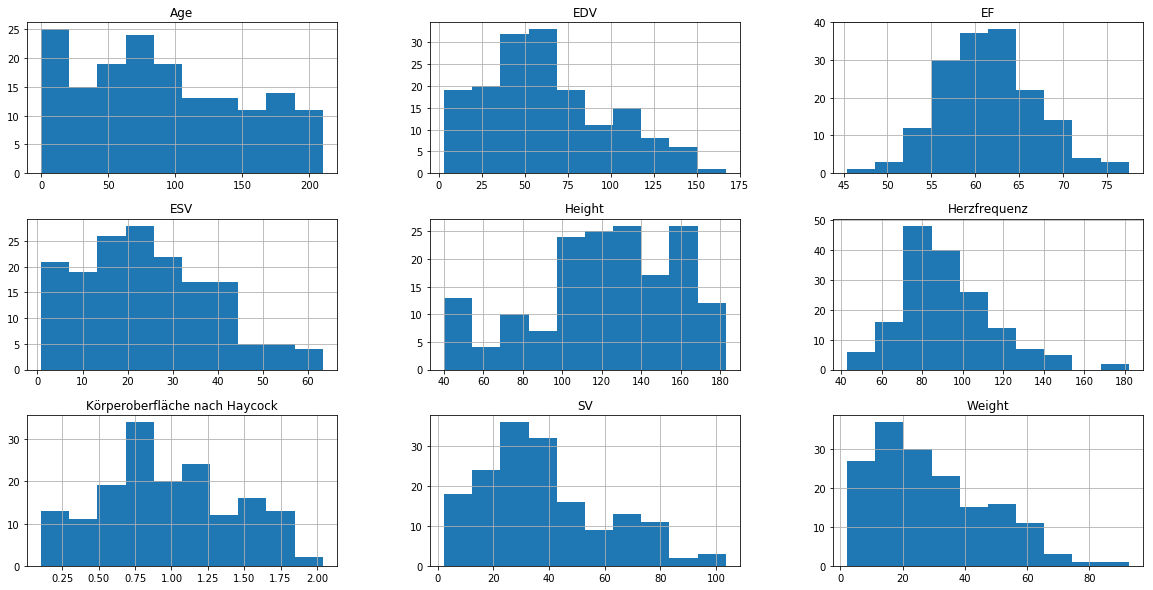

In [29]:
df1_gender1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbd1d3240>,
      dtype=object)

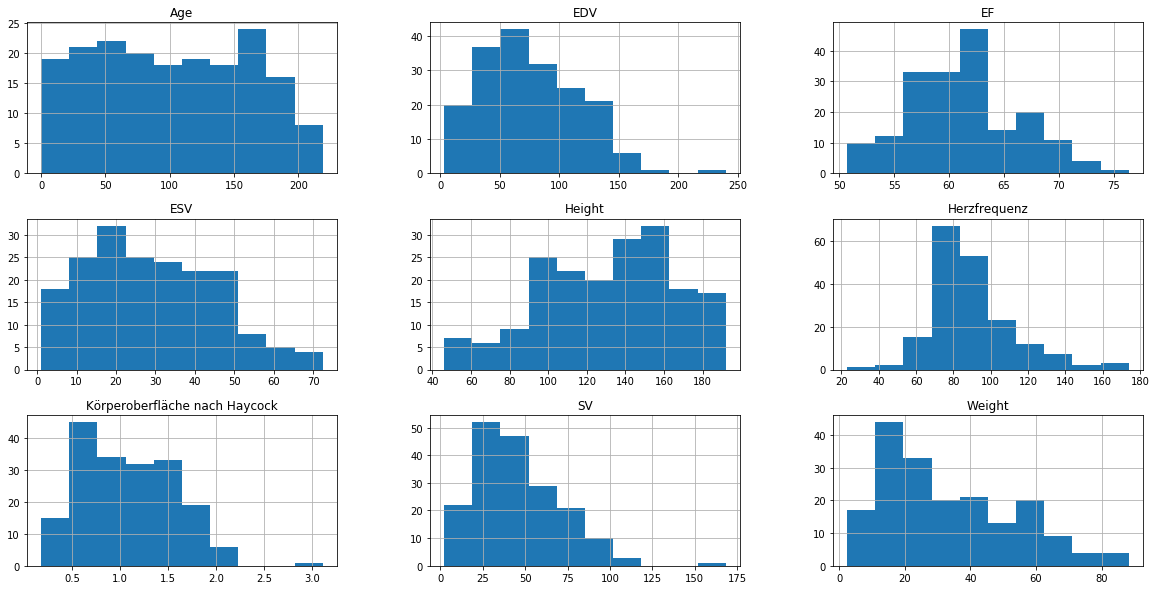

In [30]:
df1_gender2.hist()

[15, 5]


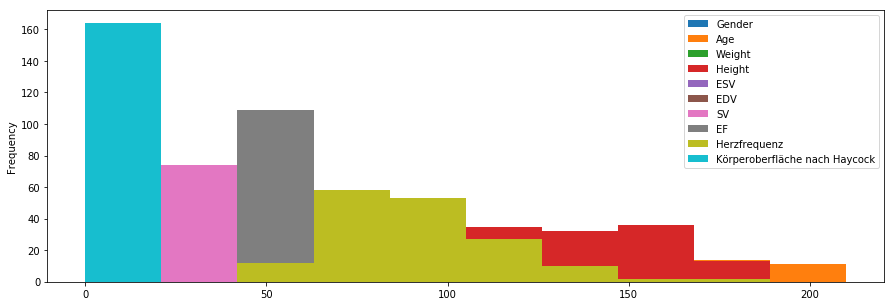

In [42]:
df1_gender1.plot(kind = "hist", bins = 10)
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 5

[15, 5]


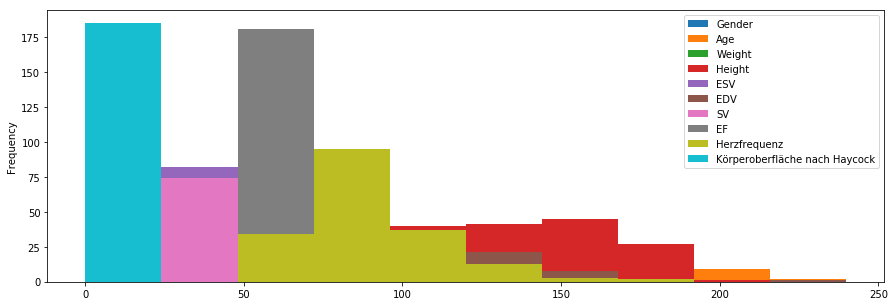

In [43]:
df1_gender2.plot(kind = "hist", bins = 10)
plt.title = "gender 2"
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print(fig_size) #100, 60
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 5

[15, 5]


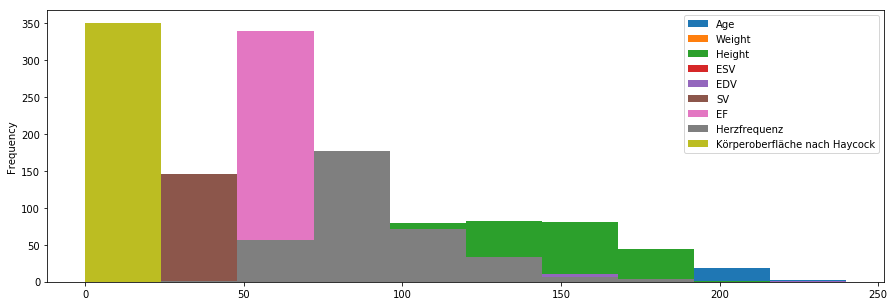

In [40]:
df1.plot( kind = "hist")
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 5

plt.show()